In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

plt.rcParams['figure.figsize'] = (12, 10)
plt.rcParams['figure.dpi'] = 300
plt.rcParams["font.family"] = "Times New Roman"     #全体のフォントを設定
plt.rcParams["font.size"] = 14 

df = pd.read_csv('../alldata.csv')

df_y = df[['UTS']]
df_X = df[['Ti', 'Mo_Equiavalent2', 'Delta', 'electronegativity', 'Bo', 'Cold Rolling Rate']]

def model_evaluation(model):
    
    model.fit(X_train, y_train)
    predictions_test = model.predict(X_test)
    predictions_train = model.predict(X_train)

    print('r2 test:', r2_score(y_test, predictions_test))
    print('r2 train:',r2_score(y_train, predictions_train))

    print('MAE:', metrics.mean_absolute_error(y_test, predictions_test))
    print('MSE:', metrics.mean_squared_error(y_test, predictions_test))
    print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions_test)))

In [8]:
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, stratify = df['stratify'], test_size=0.2, random_state=2361)
rfr = RandomForestRegressor(n_estimators=150, max_depth = 100)
rfr.fit(X_train, y_train)

predictions_test = rfr.predict(X_test)
predictions_train = rfr.predict(X_train)

<ipython-input-8-c43899bf714a>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr.fit(X_train, y_train)


In [10]:
n_est = [100, 150, 200, 250, 300]
max_d = [5, 10, 20, 30, 40, 50, 100]
res = []

for i in range(len(n_est)):
    for j in range(len(max_d)):
        X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, stratify = df['stratify'], test_size=0.2, random_state=2361)
        rfr = RandomForestRegressor(n_estimators=n_est[i], max_depth = max_d[j], verbose=0)

        rfr.fit(X_train, y_train)
        
        predict_y = rfr.predict(X_test)
        # R2決定係数で評価
        res.append(r2_score(y_test, predict_y))
        
print(res)

<ipython-input-10-b878791772ac>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr.fit(X_train, y_train)
<ipython-input-10-b878791772ac>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr.fit(X_train, y_train)
<ipython-input-10-b878791772ac>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr.fit(X_train, y_train)
<ipython-input-10-b878791772ac>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr.fit(X_train, y_train)
<ipython-input-10-b878791772ac>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please

[0.45016036569797346, 0.4337189088453308, 0.5116715524446556, 0.495441375012726, 0.4815629572985133, 0.4757402591011404, 0.5014044713424363, 0.4681304523994979, 0.48267480585202727, 0.476358547590786, 0.4548766460424567, 0.4760214525221551, 0.4710471390014148, 0.4527698264636696, 0.4430113251484322, 0.4452655113515528, 0.4684902692580032, 0.455679420414683, 0.437008593198989, 0.46003588641794446, 0.4576504481319814, 0.4743135027230132, 0.44620646938952313, 0.4459590466769445, 0.46462509606148916, 0.4795521773679853, 0.4505994481759876, 0.46490131409270674, 0.48390223372019225, 0.47182932226742247, 0.47515137629011683, 0.4610459276479866, 0.4624421209807956, 0.48516479419366276, 0.4601351396096147]


In [13]:
print(sorted(res)[-1])

0.5116715524446556


In [49]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)
{'bootstrap': [True],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True]}


{'bootstrap': [True],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

In [50]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


c:\users\ichis\.pyenv\pyenv-win\versions\3.8.2\lib\site-packages\sklearn\model_selection\_search.py:880: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


RandomizedSearchCV(estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'bootstrap': [True],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [51]:
rf_random.best_params_

{'n_estimators': 200,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 40,
 'bootstrap': True}

In [43]:
from sklearn.model_selection import GridSearchCV


In [9]:
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, stratify = df['stratify'], 
                                                    test_size=0.2, random_state=2361)
rfr = RandomForestRegressor(n_estimators=200, max_depth = 40,
                            min_samples_split=2, min_samples_leaf=4,
                            max_features="auto", bootstrap=True)

rfr.fit(X_train, y_train)
predictions_train = rfr.predict(X_train)
# R2決定係数で評価
r2_score(y_train, predictions_train)

<ipython-input-9-e8b989cb4ea3>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr.fit(X_train, y_train)


0.7468362574950875

In [10]:
predictions_test = rfr.predict(X_test)
# R2決定係数で評価
r2_score(y_test, predictions_test)

0.5293551123859045

In [11]:
model_evaluation(rfr)

r2 test: 0.5243440877120196
r2 train: 0.740268494973833
MAE: 65.96986266076092
MSE: 7116.83691631828
RMSE: 84.36134728842516


<ipython-input-7-71f837368ecd>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


In [44]:
from sklearn.model_selection import RandomizedSearchCV

search_params = {
    'n_estimators'      : [5, 10, 20, 30, 50, 100, 300],
    'random_state'      : [2525],
    'n_jobs'            : [1],
    'min_samples_split' : [3, 5, 10, 15, 20, 25, 30, 40, 50, 100],
    'max_depth'         : [3, 5, 10, 15, 20, 25, 30, 40, 50, 100]
}
 
gsr = GridSearchCV(
    RandomForestRegressor(),
    search_params,
    cv = 3,
    n_jobs = -1,
    verbose=True
)
 
gsr.fit(X_train, y_train)

Fitting 3 folds for each of 700 candidates, totalling 2100 fits


c:\users\ichis\.pyenv\pyenv-win\versions\3.8.2\lib\site-packages\sklearn\model_selection\_search.py:880: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 10, 15, 20, 25, 30, 40, 50, 100],
                         'min_samples_split': [3, 5, 10, 15, 20, 25, 30, 40, 50,
                                               100],
                         'n_estimators': [5, 10, 20, 30, 50, 100, 300],
                         'n_jobs': [1], 'random_state': [2525]},
             verbose=True)

In [46]:
print(gsr.best_estimator_)

RandomForestRegressor(max_depth=3, min_samples_split=30, n_estimators=10,
                      n_jobs=1, random_state=2525)


In [47]:
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, stratify = df['stratify'], 
                                                    test_size=0.2, random_state=2361)
rfr = RandomForestRegressor(n_estimators=10, max_depth = 3,
                            min_samples_split=30,
                            random_state=2525,
                            bootstrap=True)

rfr.fit(X_train, y_train)
predict_y = rfr.predict(X_train)
# R2決定係数で評価
r2_score(y_train, predict_y)

<ipython-input-47-3ec199ffdd49>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr.fit(X_train, y_train)


0.6010700548797688

<ipython-input-69-cbb0d732b420>:26: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


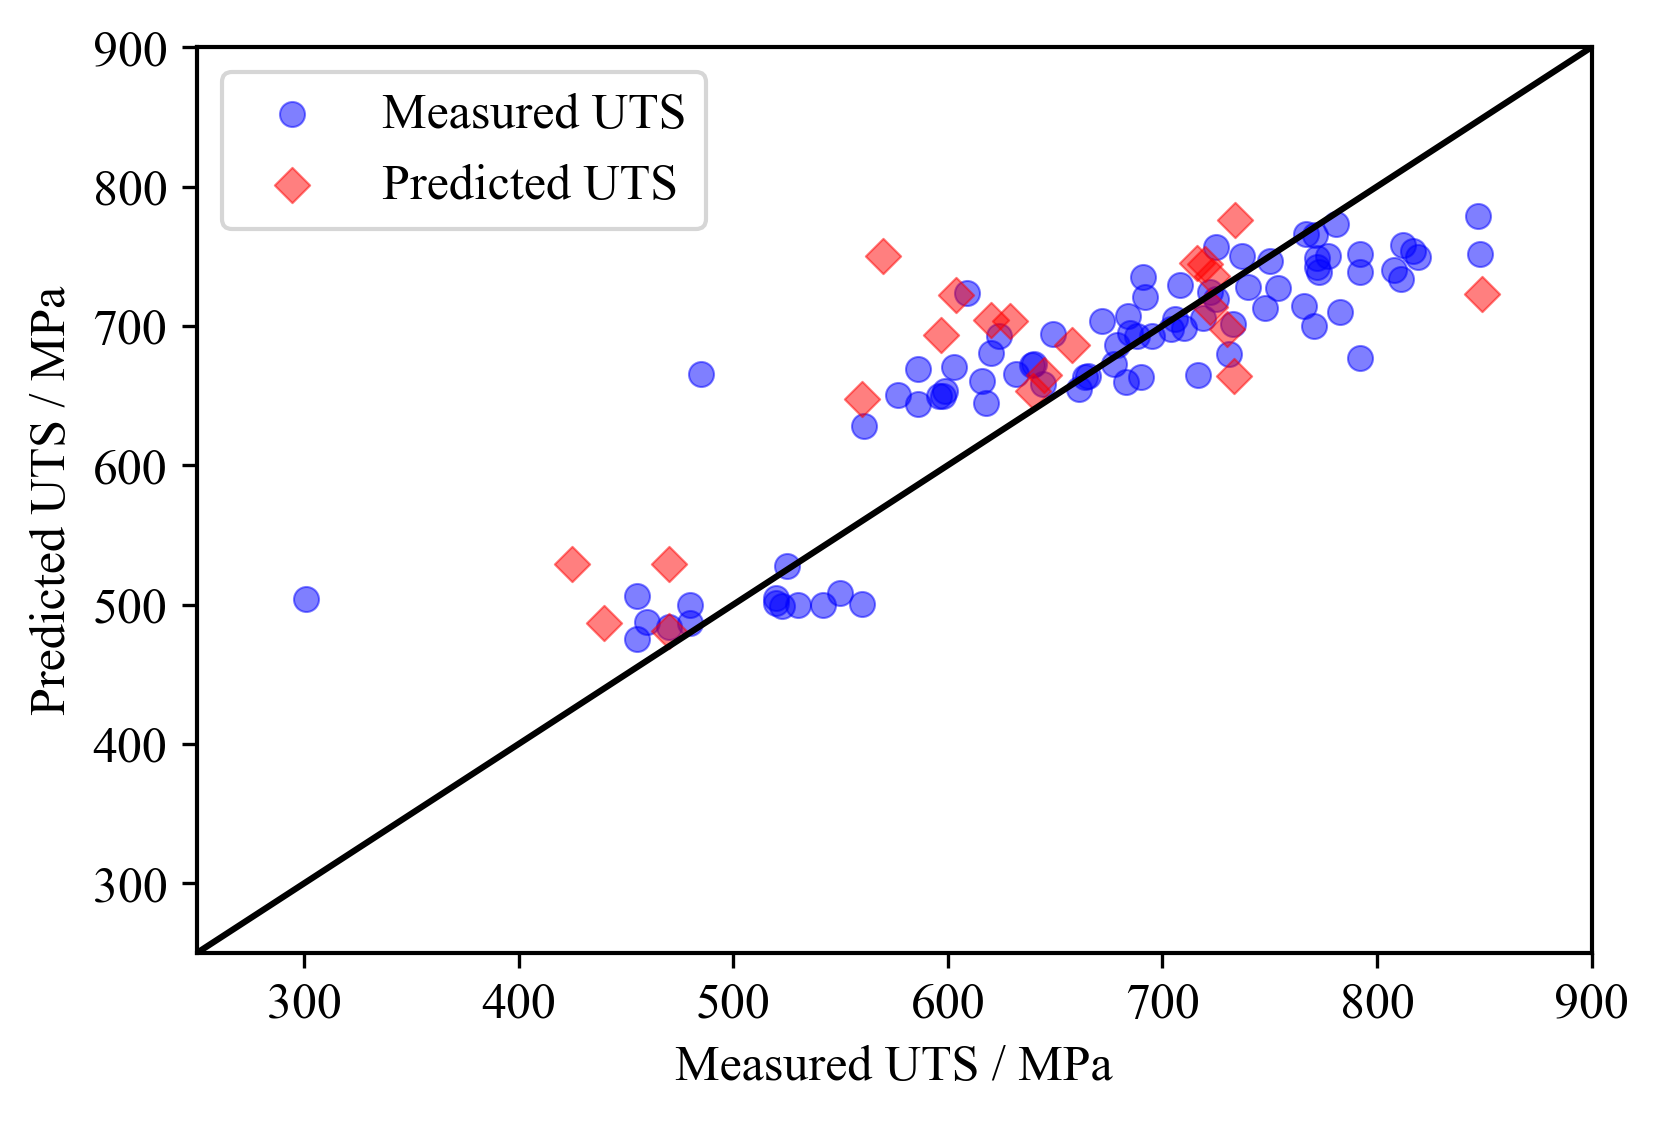

In [69]:
plt.rcParams["font.family"] = "Times New Roman"     #全体のフォントを設定
plt.rcParams["font.size"] = 12                      #フォントの大きさ
plt.rcParams["xtick.direction"] = "out"              #x軸の目盛線が内向き('in')か外向き('out')か双方向か('inout')
plt.rcParams["ytick.direction"] = "out"  
plt.rcParams["axes.linewidth"] = 1.0                #囲みの太さ
plt.rcParams['figure.dpi'] = 300
plt.rcParams['figure.figsize'] = (6,4)

x = np.linspace(250, 900)
y = x

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
line1 = ax.plot(x, y, c='black')
scatter2 = ax.scatter(y_train, predictions_train, c='blue', alpha=0.5, edgecolor='blue', linewidths=0.5, label='Measured UTS')
scatter1 = ax.scatter(y_test, predictions_test, c='red',marker="D",alpha=0.5, edgecolor='red', linewidths=0.5, label='Predicted UTS')


ax.set_xlim(250, 900)
ax.set_ylim(250, 900)
ax.legend()
# ax.set_title('Predicted UTS (by RF) vs. Measured UTS')
ax.set_xlabel('Measured UTS / MPa')
ax.set_ylabel('Predicted UTS / MPa')
plt.savefig('randomforest_UTS.png', bbox_inches="tight", pad_inches=0.05)
fig.show()